## Librerias Necesarias

In [1]:
# Instalar librearias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ydata_profiling
from NuestrasFunciones import *
from category_encoders.count import CountEncoder
from sklearn.experimental import enable_iterative_imputer

## Carga de datos

In [2]:
# Training set values
water_Pumps = pd.read_csv(r"C:\Users\byron\OneDrive\Escritorio\Byron Caviedes\MACHINE LEARNING\Tarea Water Pumps\Training set values.csv", 
                          parse_dates = ["date_recorded"])

# Training Labels
target = pd.read_csv(r"C:\Users\byron\OneDrive\Escritorio\Byron Caviedes\MACHINE LEARNING\Tarea Water Pumps\Training set labels.csv")

# Test set values
test_water_Pumps = pd.read_csv(r"C:\Users\byron\OneDrive\Escritorio\Byron Caviedes\MACHINE LEARNING\Tarea Water Pumps\Test set values.csv", 
                              parse_dates = ["date_recorded"])

In [3]:
test_water_Pumps2 = test_water_Pumps.copy()

In [4]:
test_water_Pumps3 = test_water_Pumps.copy()

## Inspeccion de datos

In [5]:
# Observaciones y Variables en water_Pumps y target
print(f'El numero de observaciones en el data set water_Pumps: es {water_Pumps.shape[0]}')
print(f'El numero de variables en el data set water_Pumps: es {water_Pumps.shape[1]}', end="\n\n")

print(f'El numero de observaciones en el data set target es: {target.shape[0]}')
print(f'El numero de variables en el data set target es: {target.shape[1]}')

El numero de observaciones en el data set water_Pumps: es 59400
El numero de variables en el data set water_Pumps: es 40

El numero de observaciones en el data set target es: 59400
El numero de variables en el data set target es: 2


In [6]:
# Informacion preliminar
water_Pumps.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
# Verificamos que no existan nan/null/0s en la target
print((target['status_group'] == 0).sum())
print(target.status_group.isna().sum())

0
0


In [9]:
# Verificamos de ids unicos en water_Pumps para poder realizar un merge con target.
water_Pumps['id'].nunique()

59400

In [10]:
# Verificamos que los ids sean unicos en target.
target['id'].nunique()

59400

In [11]:
# Verificamos qde ids de target esten en water_Pumps.
(target['id'].isin(water_Pumps['id'])).value_counts()

id
True    59400
Name: count, dtype: int64

In [12]:
# Verificamos test vs test
text_vs_train = test_water_Pumps['id'].isin(water_Pumps['id'])
text_vs_train.value_counts()

id
False    14850
Name: count, dtype: int64

Podemos osbservar que los valores de test_water_Pumps no existen en water_Pumps.

In [13]:
# Unificamos ambos datasets water_Pumps y target mediante 'id'
water_Pumps_complete = water_Pumps.merge(right = target, how = 'left', on='id')

## Revision de variables

In [14]:
pd.set_option('display.max_columns', None)
water_Pumps_complete

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Se observa que existen valores vacios 'Nan' en algunas columnas, adicionalmente existen variables muy similares entre algunas variables como `'extraction_type'`, `'extraction_type_group'`, `'extraction_type_class'`, `'quantity'`, `'quantity_group'`, `'source'`, `'source_type'`, `'source_class'`. Si estas variables son iguales o similares podemos descartar algunas de ellas.

In [15]:
# Usamos data profiling para revisar las variables y separamos por variables numericas y no numericas.
#ydata_profiling.ProfileReport(water_Pumps_complete.select_dtypes(exclude=np.number))

In [16]:
#ydata_profiling.ProfileReport(water_Pumps_complete.select_dtypes(include=np.number))

In [17]:
water_Pumps_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55763 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59398 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

### num_private | scheme_name | 'recorded_by'

In [18]:
# Filtrar los valores en la columna 'num_private' que son diferentes de cero
water_Pumps_complete['num_private'].value_counts()

#num_values = water_Pumps_complete.loc[water_Pumps_complete['num_private'] != 0, 'num_private'] #Filtro loc, se puede no hacer uso de 'num_private'
# Sumar los valores diferentes del valor 0
#num_values = valores_diferentes_de_cero.value_counts().sum()
#print(num_values)
#num_values1 = water_Pumps_complete['num_private'][water_Pumps_complete['num_private'] != 0] # Filtro boolean
#num_values1 = valores_diferentes_de_cero.value_counts().sum()
#print(num_values1)

num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64

- En la variable `'num_private'` observamos que mas **98.7%** son 0 y no existe informacion respecto a la variable en la documentacion, por lo que procederemos a eliminar esta variable.
- La variable `'scheme_name'` presenta **48.5%** de missings por lo que tambien procederemos a eliminarla.
- Y en cuanto a la variable `'recorded_by'` esta es un **valor unico** y no aporta valor al modelo.

In [19]:
# Variables a eliminar por % de missings, % de 0 y escasa informacion en documentacion, y un solo valor.
water_Pumps_complete.drop(columns=['scheme_name', 'num_private', 'recorded_by'], axis=1, inplace=True)

### extraction_type | extraction_type_group | extraction_type_class

In [20]:
water_Pumps_complete['extraction_type'].value_counts()

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [21]:
water_Pumps_complete['extraction_type_group'].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [22]:
water_Pumps_complete['extraction_type_class'].value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

In [23]:
water_Pumps_complete.groupby(['extraction_type_group','extraction_type']).count()

id  amount_tsh  \
extraction_type_group extraction_type                                
afridev               afridev                     1770        1770   
gravity               gravity                    26780       26780   
india mark ii         india mark ii               2400        2400   
india mark iii        india mark iii                98          98   
mono                  mono                        2865        2865   
nira/tanira           nira/tanira                 8154        8154   
other                 other                       6430        6430   
other handpump        other - mkulima/shinyanga      2           2   
                      other - play pump             85          85   
                      other - swn 81               229         229   
                      walimi                        48          48   
other motorpump       cemo                          90          90   
                      climax                        32          32   
rope pump             other - rope pump            451         451   
submersible           ksb                         1415        1415   
                      submersible                 4764        4764   
swn 80                swn 80                      3670        3670   
wind-powered          windmill                     117         117   

                                                 date_recorded  funder  \
extraction_type_group extraction_type                                    
afridev               afridev                             1770    1668   
gravity               gravity                            26780   24704   
india mark ii         india mark ii                       2400    2358   
india mark iii        india mark iii                        98      98   
mono                  mono                                2865    2577   
nira/tanira           nira/tanira                         8154    7899   
other                 other                               6430    6010   
other handpump        other - mkulima/shinyanga              2       1   
                      other - play pump                     85      85   
                      other - swn 81                       229     219   
                      walimi                                48      48   
other motorpump       cemo                                  90      90   
                      climax                                32      32   
rope pump             other - rope pump                    451     448   
submersible           ksb                                 1415    1411   
                      submersible                         4764    4408   
swn 80                swn 80                              3670    3595   
wind-powered          windmill                             117     112   

                                                 gps_height  installer  \
extraction_type_group extraction_type                                    
afridev               afridev                          1770       1665   
gravity               gravity                         26780      24714   
india mark ii         india mark ii                    2400       2358   
india mark iii        india mark iii                     98         98   
mono                  mono                             2865       2578   
nira/tanira           nira/tanira                      8154       7885   
other                 other                            6430       6002   
other handpump        other - mkulima/shinyanga           2          2   
                      other - play pump                  85         85   
                      other - swn 81                    229        219   
                      walimi                             48         48   
other motorpump       cemo                               90         90   
                      climax                             32         32   
rope pump             other - rope pump                 451 

In [24]:
water_Pumps_complete.groupby(['extraction_type_class','extraction_type_group']).count()

id  amount_tsh  date_recorded  \
extraction_type_class extraction_type_group                                     
gravity               gravity                26780       26780          26780   
handpump              afridev                 1770        1770           1770   
                      india mark ii           2400        2400           2400   
                      india mark iii            98          98             98   
                      nira/tanira             8154        8154           8154   
                      other handpump           364         364            364   
                      swn 80                  3670        3670           3670   
motorpump             mono                    2865        2865           2865   
                      other motorpump          122         122            122   
other                 other                   6430        6430           6430   
rope pump             rope pump                451         451            451   
submersible           submersible             6179        6179           6179   
wind-powered          wind-powered             117         117            117   

                                             funder  gps_height  installer  \
extraction_type_class extraction_type_group                                  
gravity               gravity                 24704       26780      24714   
handpump              afridev                  1668        1770       1665   
                      india mark ii            2358        2400       2358   
                      india mark iii             98          98         98   
                      nira/tanira              7899        8154       7885   
                      other handpump            353         364        354   
                      swn 80                   3595        3670       3593   
motorpump             mono                     2577        2865       2578   
                      other motorpump           122         122        122   
other                 other                    6010        6430       6002   
rope pump             rope pump                 448         451        448   
submersible           submersible              5819        6179       5816   
wind-powered          wind-powered              112         117        112   

                                             longitude  latitude  wpt_name  \
extraction_type_class extraction_type_group                                  
gravity               gravity                    26780     26780     26779   
handpump              afridev                     1770      1770      1770   
                      india mark ii               2400      2400      2400   
                      india mark iii                98        98        98   
                      nira/tanira                 8154      8154      8154   
                      other handpump               364       364       364   
                      swn 80                      3670      3670      3670   
motorpump             mono                        2865      2865      2865   
                      other motorpump              122       122       122   
other                 other                       6430      6430      6429   
rope pump             rope pump                    451       451       451   
submersible           submersible                 6179      6179      6179   
wind-powered          wind-powered                 117       117       117   

                                             basin  subvillage  region  \
extraction_type_class extraction_type_group                              
gravity               gravity                26780       26646   26780   
handpump              afridev                 1770        1770    1770   
                      india mark ii           2400        2400    2400   
                      india mark iii            98          98      98   
                      nira/tanira             

Realizando una comparacion entre las 3 variables observamos que `'extraction_type_class'` contiene a `'extraction_type_group`' y `'extraction_type'` por lo que nos quedaremos con extraction_type_class ya que concentra mejor los valores y los vuelve mas representativos. 

In [25]:
water_Pumps_complete.drop(columns=['extraction_type_group', 'extraction_type'], inplace=True)

### quantity | quantity_group

In [26]:
water_Pumps_complete['quantity'].value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [27]:
water_Pumps_complete['quantity_group'].value_counts()

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

Las variables `'quantity'` y `'quantity_group'` son exactamente las mismas por lo que eliminamos 'quantity_group'

In [28]:
water_Pumps_complete.drop(columns=['quantity_group'], inplace=True)

### source | source_type | source_class

In [29]:
water_Pumps_complete['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [30]:
water_Pumps_complete['source_type'].value_counts()

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

In [31]:
water_Pumps_complete['source_class'].value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

De la misma forma tenemos que estas 3 variables contienen la misma informacion, por lo que procedemos a utilizar unicamente `'source'` y unificaremos other con unknown para como se encuentra en las otras variables para hacerla mas representativa

In [32]:
water_Pumps_complete['source'].replace('unknown', 'other', inplace=True)

In [33]:
water_Pumps_complete.drop(columns=['source_type', 'source_class'], inplace=True)

In [34]:
water_Pumps_complete

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999,gravity,vwc,user-group,pay annually,annually,soft,good,enough,spring,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,True,2010,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,dam,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,user-group,never pay,never pay,soft,good,dry,machine dbh,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,True,0,gravity,other,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,True,1999,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,spring,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,True,1996,gravity,vwc,user-group,pay annually,annually,soft,good,enough,river,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,False,0,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,machine dbh,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,VWC,True,0,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,shallow well,hand pump,hand pump,functional


### scheme_management | management | management_group

In [35]:
print(water_Pumps_complete['management'].value_counts())

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64


In [36]:
water_Pumps_complete['management_group'].value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

In [37]:
water_Pumps_complete.loc[water_Pumps_complete['management_group'] == 'user-group', 'management'].value_counts()

management
vwc            40507
wug             6515
water board     2933
wua             2535
Name: count, dtype: int64

Segun la documentacion y la informacion obtenida, la variable `'management_group'` agrupa a `'management'` de la siguiente forma.
- unknown = unknown
- other = other + other-school
- parastatal = parastatal
- commercial = private operator + water authority + trust
- user-group = vwc + wug + waterboard + wua


In [38]:
val_sch_mang = water_Pumps_complete['scheme_management'].value_counts().sum()
print(water_Pumps_complete['scheme_management'].value_counts())
print(f'Total valores: {val_sch_mang}')

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64
Total valores: 55522


La variable `'scheme_management'` y `'management'` son similares sin embargo como observamos en el resumen de variables scheme_management tiene missings por lo que utilizaremos management.

In [39]:
water_Pumps_complete.drop(columns='scheme_management', inplace=True)

### waterpoint_type | waterpoint_type_group

In [40]:
water_Pumps_complete['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [41]:
water_Pumps_complete['waterpoint_type_group'].value_counts()

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

En el caso de `'waterpoint_type'` y `'waterpoint_type_group'` eliminaremos la segunda ya que los valores estan un mejor distribuidos

In [42]:
water_Pumps_complete.drop(columns='waterpoint_type_group', inplace=True)

### water_quality | quality_group

In [43]:
water_Pumps_complete['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [44]:
water_Pumps_complete['quality_group'].value_counts()

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

In [45]:
water_Pumps_complete.drop(columns='quality_group', inplace=True)

### region | region_code

In [46]:
water_Pumps_complete['region'].value_counts()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

In [47]:
water_Pumps_complete['region_code'].value_counts()

region_code
11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: count, dtype: int64

La variable `'region'` tiene datos mejor representados por lo que descartaremos `'region_code'`

In [48]:
water_Pumps_complete.drop(columns='region_code', inplace=True)

### payment | payment_type

In [49]:
water_Pumps_complete['payment'].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

water_Pumps_complete['payment_type'].value_counts()

Ambas variables contienen la misma informacion por lo que procedemos a eliminar `'payment_type'`

In [50]:
water_Pumps_complete.drop(columns='payment_type', inplace=True)

### wpt_name

In [51]:
water_Pumps_complete['wpt_name'].value_counts()

wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: count, Length: 37399, dtype: int64

Procedemos a eliminar de la base a `'wpt_name'` ya que no aporta ninguna valor.

In [52]:
water_Pumps_complete.drop(columns='wpt_name', axis=1, inplace=True)

### funder | installer | subvillage

In [53]:
water_Pumps_complete['funder'].fillna(value='Unknown', inplace=True)

In [54]:
water_Pumps_complete['installer'].fillna(value='Unknown', inplace=True)

In [55]:
water_Pumps_complete['subvillage'].fillna(value='Unknown', inplace=True)

Para las variables `'funder'`, `'installer'`, `'subvillage'` se reemplazo 'Nan' por 'Unknown'.

### public_meeting | permit

In [56]:
water_Pumps_complete.public_meeting.value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

In [57]:
water_Pumps_complete.permit.value_counts()

permit
True     38852
False    17492
Name: count, dtype: int64

In [58]:
water_Pumps_complete['public_meeting'] = water_Pumps_complete['public_meeting'].replace(to_replace=np.nan, value=True)

In [59]:
water_Pumps_complete['permit'] = water_Pumps_complete['permit'].replace(to_replace=np.nan, value=True)

Para `'public_meeting'` y `'permit'` reemplazamos los missings por el valor mas frecuente.

In [60]:
water_Pumps_complete.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

### construction_year

In [61]:
water_Pumps_complete['construction_year'].value_counts().head()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: count, dtype: int64

In [62]:
pd.crosstab(water_Pumps_complete['construction_year'] == 0, water_Pumps_complete['status_group'])

status_group,functional,functional needs repair,non functional
construction_year,,,
False,21704,2528,14459
True,10555,1789,8365


In [63]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [64]:
imputer = IterativeImputer(missing_values=0)

In [65]:
col_construction_year = water_Pumps_complete['construction_year'].values.reshape(-1, 1).astype('int64')

In [66]:
construction_year_imputer = imputer.fit_transform(col_construction_year)
construction_year_imputer = construction_year_imputer.round().astype('int64')

In [67]:
water_Pumps_complete['construction_year'] = construction_year_imputer

In [68]:
pd.crosstab(water_Pumps_complete['construction_year'], water_Pumps_complete['status_group']).head()

status_group,functional,functional needs repair,non functional
construction_year,,,
1960,24,6,72
1961,2,3,16
1962,7,1,22
1963,31,6,48
1964,7,1,32


Para la variable `'construction_year'` se procedio a revisar el numero de anos iguales a 0, y estos representaban el 34.9% del total lo que son 20709 valores. Estos valores de 0 fueron comparados con la variable target `'status_group'` para observar como se comportan. Para realizar una imputacion mas precisa se procedio a realizar imputacion multivariante.

### New column : date_year_recorded

In [69]:
water_Pumps_complete['date_year_recorded'] = water_Pumps_complete['date_recorded'].dt.year

In [70]:
water_Pumps_complete['antiguedad'] = water_Pumps_complete['date_year_recorded'] - water_Pumps_complete['construction_year']

In [71]:
water_Pumps_complete['antiguedad'] = water_Pumps_complete['antiguedad'].astype('int64')

In [72]:
pd.crosstab(water_Pumps_complete['antiguedad'], water_Pumps_complete['status_group']).head(10)

status_group,functional,functional needs repair,non functional
antiguedad,,,
-7,1,0,0
-5,2,0,1
-4,1,0,1
-3,0,0,1
-2,0,0,1
-1,0,0,1
0,413,11,164
1,1754,66,483
2,1600,87,442


In [73]:
water_Pumps_complete.loc[water_Pumps_complete['antiguedad'] < 0, 'antiguedad'] = 0

In [74]:
pd.crosstab(water_Pumps_complete['antiguedad'], water_Pumps_complete['status_group']).head()

status_group,functional,functional needs repair,non functional
antiguedad,,,
0,417,11,169
1,1754,66,483
2,1600,87,442
3,1949,110,681
4,1256,140,494


In [75]:
water_Pumps_complete.drop('date_recorded', inplace=True, axis=1)

In [76]:
water_Pumps_complete.drop('date_year_recorded', inplace=True, axis=1)

## Check-point

Nuestro checkpoin corresponde a todo el proceso previo de analisis simple realizado para el data frame como eliminacion de variables poco relevantes, con demasiados missings o que repiten informacion. 

In [77]:
df1 = water_Pumps_complete.copy()

In [78]:
df1

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,True,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,True,1997,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,functional,14
59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,functional,15
59397,37057,0.0,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,0,True,False,1997,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,functional,14
59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,0,True,True,1997,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,14


## Transformacion de variables con muchas categ a numericas

In [79]:
# Procedemos a separa las variables que tienen valores unicos muy altos para transformar mediante frecuency encoder (count encoder)

In [80]:
cols_cat_countEnc = ['funder', 'installer', 'subvillage', 'lga', 'ward']

In [81]:
count_enc = CountEncoder(handle_missing='value')

for col in cols_cat_countEnc:
    count_enc.fit(df1[col])
    df1[col] = count_enc.transform(df1[col])

Para las variables categoricas que cuentan con muchas categorias como son `'funder'`, `'installer'`, `'subvillage'`, `'lga'`, `'ward'` se usara CountEncoder asi registramos la frecuencia. Y en el caso de tener nulos los tratamos como una categoria a parte.

In [82]:
df1

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad
0,69572,6000.0,275,1390,94,34.938093,-9.856322,Lake Nyasa,6,Iringa,5,564,36,109,True,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,12
1,8776,0.0,53,1399,39,34.698766,-2.147466,Lake Victoria,5,Mara,2,716,71,280,True,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3
2,34310,25.0,8,686,408,37.460664,-3.821329,Pangani,502,Manyara,4,308,10,250,True,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4
3,67743,0.0,1057,263,222,38.486161,-11.155298,Ruvuma / Southern Coast,17,Mtwara,63,158,32,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27
4,19728,0.0,1,0,135,31.130847,-1.825359,Lake Victoria,2,Kagera,1,771,13,0,True,True,1997,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,610,1210,610,37.169807,-3.253847,Pangani,4,Kilimanjaro,5,625,116,125,True,True,1999,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,functional,14
59396,27263,4700.0,23,1212,15,35.249991,-9.070629,Rufiji,14,Iringa,4,2503,53,56,True,True,1996,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,functional,15
59397,37057,0.0,3641,0,3658,34.017087,-8.750434,Rufiji,2,Mbeya,7,626,88,0,True,False,1997,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,functional,14
59398,31282,0.0,3,0,5,35.861315,-6.378573,Rufiji,24,Dodoma,4,347,25,0,True,True,1997,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,14


In [83]:
list_labelEnc = list(df1.loc[:,df1.nunique() < 22])
df1[list_labelEnc].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   basin                  59400 non-null  object
 1   region                 59400 non-null  object
 2   district_code          59400 non-null  int64 
 3   public_meeting         59400 non-null  bool  
 4   permit                 59400 non-null  bool  
 5   extraction_type_class  59400 non-null  object
 6   management             59400 non-null  object
 7   management_group       59400 non-null  object
 8   payment                59400 non-null  object
 9   water_quality          59400 non-null  object
 10  quantity               59400 non-null  object
 11  source                 59400 non-null  object
 12  waterpoint_type        59400 non-null  object
 13  status_group           59400 non-null  object
dtypes: bool(2), int64(1), object(11)
memory usage: 5.6+ MB


In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()
for l in list_labelEnc:
    not_null_Value = df1[l].notna()
    values_to_encode = df1.loc[not_null_Value, l]
    le.fit(values_to_encode)
    df1.loc[not_null_Value, l] = le.transform(values_to_encode)

C:\Users\byron\AppData\Local\Temp\ipykernel_19700\1104807421.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1.loc[not_null_Value, l] = le.transform(values_to_encode)
C:\Users\byron\AppData\Local\Temp\ipykernel_19700\1104807421.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 ... 0 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1.loc[not_null_Value, l] = le.transform(values_to_encode)


In [86]:
df1

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad
0,69572,6000.0,275,1390,94,34.938093,-9.856322,1,6,3,5,564,36,109,1,0,1999,0,7,4,2,6,1,8,1,0,12
1,8776,0.0,53,1399,39,34.698766,-2.147466,4,5,9,2,716,71,280,1,1,2010,0,11,4,0,6,2,5,1,0,3
2,34310,25.0,8,686,408,37.460664,-3.821329,5,502,8,4,308,10,250,1,1,2009,0,7,4,4,6,1,0,2,0,4
3,67743,0.0,1057,263,222,38.486161,-11.155298,7,17,12,17,158,32,58,1,1,1986,5,7,4,0,6,0,3,2,2,27
4,19728,0.0,1,0,135,31.130847,-1.825359,4,2,4,1,771,13,0,1,1,1997,0,1,1,0,6,3,5,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,610,1210,610,37.169807,-3.253847,5,4,6,5,625,116,125,1,1,1999,0,9,4,4,6,1,8,1,0,14
59396,27263,4700.0,23,1212,15,35.249991,-9.070629,6,14,3,4,2503,53,56,1,1,1996,0,7,4,2,6,1,6,1,0,15
59397,37057,0.0,3641,0,3658,34.017087,-8.750434,6,2,10,7,626,88,0,1,0,1997,1,7,4,3,1,1,3,4,0,14
59398,31282,0.0,3,0,5,35.861315,-6.378573,6,24,2,4,347,25,0,1,1,1997,1,7,4,0,6,2,7,4,0,14


## Categoricas a Numericas

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  int64  
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   basin                  59400 non-null  object 
 8   subvillage             59400 non-null  int64  
 9   region                 59400 non-null  object 
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  int64  
 12  ward                   59400 non-null  int64  
 13  population             59400 non-null  int64  
 14  public_meeting         59400 non-null  object 
 15  pe

In [88]:
categ_cols = df1.select_dtypes(exclude=np.number)
for col in categ_cols:
    df1[col] = df1[col].astype('int64')

# Modelo

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [90]:
X = df1.drop(columns='status_group', axis=1)
y = df1['status_group']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [92]:
clf = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             max_depth=15, 
                             random_state=93, 
                             n_jobs=-1, 
                             min_samples_split=5, 
                             max_features='sqrt')

In [93]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_jobs=-1, random_state=93)

In [94]:
y_pred = clf.predict(X_test)

In [95]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      9691
           1       0.74      0.26      0.38      1356
           2       0.88      0.70      0.78      6773

    accuracy                           0.80     17820
   macro avg       0.79      0.63      0.67     17820
weighted avg       0.80      0.80      0.78     17820



In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

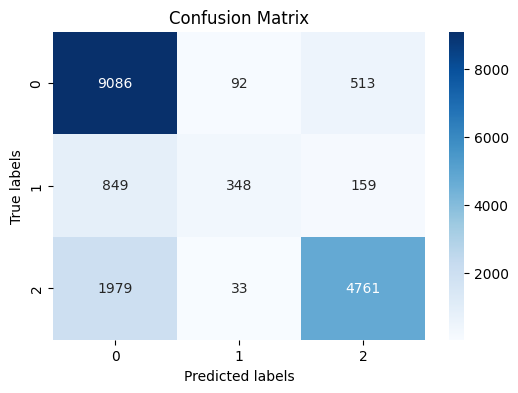

In [98]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
def tranform_water_pump(X_text):
    # Eliminacion de variables poco relevantes, repetidas o con muchos missings o 0s
    X_text.drop(columns=['scheme_name', 'num_private', 'recorded_by'], axis=1, inplace=True)
    X_text.drop(columns=['extraction_type_group', 'extraction_type'], inplace=True)
    X_text.drop(columns=['quantity_group'], inplace=True)
    X_text['source'].replace('unknown', 'other', inplace=True)
    X_text.drop(columns=['source_type', 'source_class'], inplace=True)
    X_text.drop(columns='scheme_management', inplace=True)
    X_text.drop(columns='waterpoint_type_group', inplace=True)
    X_text.drop(columns='quality_group', inplace=True)
    X_text.drop(columns='region_code', inplace=True)
    X_text.drop(columns='payment_type', inplace=True)
    X_text.drop(columns='wpt_name', axis=1, inplace=True)
    # Fill nan
    X_text['funder'].fillna(value='Unknown', inplace=True)
    X_text['installer'].fillna(value='Unknown', inplace=True)
    X_text['subvillage'].fillna(value='Unknown', inplace=True)
    # replace missings with most frequent
    X_text['public_meeting'] = X_text['public_meeting'].replace(to_replace=np.nan, value=1)
    X_text['permit'] = X_text['permit'].replace(to_replace=np.nan, value=1)
    # Imputacion
    imputer = IterativeImputer(missing_values=0)
    col_construction_year = X_text['construction_year'].values.reshape(-1, 1).astype('int')
    construction_year_imputer = imputer.fit_transform(col_construction_year)
    construction_year_imputer = construction_year_imputer.round().astype('int')
    X_text['construction_year'] = construction_year_imputer
    # Dates y antiguedad 
    X_text['date_year_recorded'] = X_text['date_recorded'].dt.year
    X_text['antiguedad'] = X_text['date_year_recorded'] - X_text['construction_year']
    X_text['antiguedad'] = X_text['antiguedad'].astype('int')
    X_text.loc[X_text['antiguedad'] < 0, 'antiguedad'] = 0
    X_text.drop('date_recorded', inplace=True, axis=True)
    X_text.drop('date_year_recorded', inplace=True, axis=True)
    # Count encoder y Label encoder
    cols_cat_countEnc = ['funder', 'installer', 'subvillage', 'lga', 'ward']
    count_enc = CountEncoder(handle_missing='value')
    for col in cols_cat_countEnc:
        count_enc.fit(X_text[col])
        X_text[col] = count_enc.transform(X_text[col])
        
    listlabelEnc = list(X_text.loc[:,X_text.nunique() < 22])
    le = LabelEncoder()
    for colmn in listlabelEnc:
        not_null_Value = X_text[colmn].notna()
        values_to_encode = X_text.loc[not_null_Value, colmn]
        le.fit(values_to_encode)
        X_text.loc[not_null_Value, colmn] = le.transform(values_to_encode)
    categ_cols = X_text.select_dtypes(exclude=np.number)
    for col in categ_cols:
        X_text[col] = X_text[col].astype('int')

    return X_test

In [100]:
tranform_water_pump(test_water_Pumps)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,antiguedad
43738,57909,0.0,189,1354,210,37.617436,-3.198877,5,6,6,1,594,17,1,1,1,2009,0,0,0,3,6,1,8,1,4
61,40393,0.0,9084,1670,17402,38.376671,-4.647289,5,1,20,1,694,7,1,1,1,1992,3,7,4,0,6,1,7,6,19
47945,34158,0.0,4,0,4,31.329283,-2.695269,3,1,4,4,403,66,0,1,1,1997,0,7,4,0,6,1,8,1,14
33417,58174,0.0,259,0,113,32.929872,-3.094016,4,8,13,7,348,10,0,1,1,1997,1,7,4,2,6,1,3,4,14
43259,34161,0.0,9084,1711,17402,37.489057,-3.258009,5,6,6,4,1251,32,1,0,1,1972,0,7,4,0,6,1,8,6,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53040,11119,500.0,48,1789,30,34.808090,-9.047009,6,6,3,4,2503,153,203,1,1,2010,0,11,4,3,6,1,8,1,1
54964,58620,0.0,448,0,17402,33.570450,-3.357751,0,5,17,8,399,44,0,1,0,1997,0,3,2,6,6,3,5,6,15
58272,9,0.0,198,0,105,31.693371,-2.530703,4,134,4,8,236,27,0,1,1,1997,2,7,4,0,6,2,3,2,14
46760,4472,50.0,18,507,17402,37.653357,-6.752928,8,2,11,5,96,23,560,1,1,1999,0,7,4,4,6,2,0,1,12


In [101]:
y_pred_test = clf.predict(test_water_Pumps)

In [102]:
test_water_Pumps['status_group'] = y_pred_test

In [103]:
status_group_names = {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

In [104]:
test_water_Pumps['status_group'].replace(status_group_names, inplace=True)

In [105]:
subir = test_water_Pumps[['id', 'status_group']].copy()

In [106]:
subir.reset_index(drop=True, inplace=True)

In [107]:
subir.to_csv('subir.csv', index=False)

## Variacion de preprocesado desde checkpoint

In [108]:
df2 = water_Pumps_complete.copy()

In [109]:
df2

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,True,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,True,1997,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,functional,14
59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,functional,15
59397,37057,0.0,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,0,True,False,1997,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,functional,14
59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,0,True,True,1997,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,14


In [110]:
corr = abs(df1.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
antiguedad,0.232674
construction_year,0.231496
waterpoint_type,0.206507
extraction_type_class,0.175338
ward,0.159053
lga,0.136878
quantity,0.131425
funder,0.123174
gps_height,0.114029


In [111]:
# Se procede a realizar label encoder o onehot, binning, rarelabelencoder enfocada a cada variable para tener un mejro efecto

In [112]:
df2.select_dtypes(exclude=np.number).describe()

,funder,installer,basin,subvillage,region,lga,ward,public_meeting,permit,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1896,2145,9,19288,21,125,2092,2,2,7,12,5,7,8,5,9,7,3
top,Government Of Tanzania,DWE,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,True,gravity,vwc,user-group,never pay,soft,enough,spring,communal standpipe,functional
freq,9084,17402,10248,508,5294,2503,307,54345,41908,26780,40507,52490,25348,50818,33186,17021,28522,32259


In [113]:
#!pip install feature-engine
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

In [114]:
rle = RareLabelCategoricalEncoder(n_categories = 1, tol=0.05, variables=['funder', 'installer'])

In [115]:
rle.fit(df2)

RareLabelCategoricalEncoder(n_categories=1, variables=['funder', 'installer'])

In [116]:
rle.transform(df2)

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad
0,69572,6000.0,Rare,1390,Rare,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,12
1,8776,0.0,Rare,1399,Rare,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,True,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3
2,34310,25.0,Rare,686,Rare,37.460664,-3.821329,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4
3,67743,0.0,Rare,263,Rare,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27
4,19728,0.0,Rare,0,Rare,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,True,True,1997,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Rare,1210,Rare,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,functional,14
59396,27263,4700.0,Rare,1212,Rare,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,functional,15
59397,37057,0.0,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,0,True,False,1997,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,functional,14
59398,31282,0.0,Rare,0,Rare,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,0,True,True,1997,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,14


In [117]:
rle.transform(df2)['funder'].nunique()

4

In [118]:
rle.transform(df2)['installer'].nunique()

3

In [119]:
df2 = rle.transform(df2)

In [120]:
# Pasamos a dummies

In [121]:
to_dummies = ['public_meeting', 'permit', 'funder', 'installer']

In [122]:
for d in to_dummies:
    dummies = pd.get_dummies(df2[d],prefix=d, dtype=int)
    df2 = pd.concat([df2, dummies], axis=1)
    df2.drop(d, axis=1, inplace=True)

In [123]:
df2

,id,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad,public_meeting_False,public_meeting_True,permit_False,permit_True,funder_Danida,funder_Government Of Tanzania,funder_Rare,funder_Unknown,installer_DWE,installer_Rare,installer_Unknown
0,69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,12,0,1,1,0,0,0,1,0,0,1,0
1,8776,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3,0,1,0,1,0,0,1,0,0,1,0
2,34310,25.0,686,37.460664,-3.821329,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4,0,1,0,1,0,0,1,0,0,1,0
3,67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27,0,1,0,1,0,0,1,0,0,1,0
4,19728,0.0,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,0,1997,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,14,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,5,Hai,Masama Magharibi,125,1999,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,functional,14,0,1,0,1,0,0,1,0,0,1,0
59396,27263,4700.0,1212,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,4,Njombe,Ikondo,56,1996,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,functional,15,0,1,0,1,0,0,1,0,0,1,0
59397,37057,0.0,0,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,7,Mbarali,Chimala,0,1997,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,functional,14,0,1,1,0,0,0,0,1,0,0,1
59398,31282,0.0,0,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,4,Chamwino,Mvumi Makulu,0,1997,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,14,0,1,0,1,0,0,1,0,0,1,0


In [124]:
# Calcular la matriz de contingencia
contingency_table = pd.crosstab(df2['lga'], df2['ward'])

# Calcular la correlación de chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Imprimir el valor de chi-cuadrado y el p-value
print("\nChi-cuadrado:", chi2)
print("p-value:", p)


Chi-cuadrado: 7085105.494439563
p-value: 0.0


In [125]:
df2.drop(columns=['lga', 'construction_year'], axis=1, inplace=True)

In [126]:
df2

,id,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,district_code,ward,population,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad,public_meeting_False,public_meeting_True,permit_False,permit_True,funder_Danida,funder_Government Of Tanzania,funder_Rare,funder_Unknown,installer_DWE,installer_Rare,installer_Unknown
0,69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,Mundindi,109,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,12,0,1,1,0,0,0,1,0,0,1,0
1,8776,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,Natta,280,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3,0,1,0,1,0,0,1,0,0,1,0
2,34310,25.0,686,37.460664,-3.821329,Pangani,Majengo,Manyara,4,Ngorika,250,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4,0,1,0,1,0,0,1,0,0,1,0
3,67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,58,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27,0,1,0,1,0,0,1,0,0,1,0
4,19728,0.0,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,Nyakasimbi,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,14,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,5,Masama Magharibi,125,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,functional,14,0,1,0,1,0,0,1,0,0,1,0
59396,27263,4700.0,1212,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,4,Ikondo,56,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,functional,15,0,1,0,1,0,0,1,0,0,1,0
59397,37057,0.0,0,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,7,Chimala,0,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,functional,14,0,1,1,0,0,0,0,1,0,0,1
59398,31282,0.0,0,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,4,Mvumi Makulu,0,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,14,0,1,0,1,0,0,1,0,0,1,0


In [127]:
df2.select_dtypes(exclude=np.number).describe()

,basin,subvillage,region,ward,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,9,19288,21,2092,7,12,5,7,8,5,9,7,3
top,Lake Victoria,Madukani,Iringa,Igosi,gravity,vwc,user-group,never pay,soft,enough,spring,communal standpipe,functional
freq,10248,508,5294,307,26780,40507,52490,25348,50818,33186,17021,28522,32259


In [128]:
# Count encoder

In [129]:
cols_cat_countEnc = ['subvillage', 'ward']

In [130]:
count_enc = CountEncoder(handle_missing='value')

for col in cols_cat_countEnc:
    count_enc.fit(df2[col])
    df2[col] = count_enc.transform(df2[col])

In [131]:
df2

,id,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,district_code,ward,population,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,antiguedad,public_meeting_False,public_meeting_True,permit_False,permit_True,funder_Danida,funder_Government Of Tanzania,funder_Rare,funder_Unknown,installer_DWE,installer_Rare,installer_Unknown
0,69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,6,Iringa,5,36,109,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,12,0,1,1,0,0,0,1,0,0,1,0
1,8776,0.0,1399,34.698766,-2.147466,Lake Victoria,5,Mara,2,71,280,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,3,0,1,0,1,0,0,1,0,0,1,0
2,34310,25.0,686,37.460664,-3.821329,Pangani,502,Manyara,4,10,250,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,4,0,1,0,1,0,0,1,0,0,1,0
3,67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,17,Mtwara,63,32,58,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,27,0,1,0,1,0,0,1,0,0,1,0
4,19728,0.0,0,31.130847,-1.825359,Lake Victoria,2,Kagera,1,13,0,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,14,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,Pangani,4,Kilimanjaro,5,116,125,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,functional,14,0,1,0,1,0,0,1,0,0,1,0
59396,27263,4700.0,1212,35.249991,-9.070629,Rufiji,14,Iringa,4,53,56,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,functional,15,0,1,0,1,0,0,1,0,0,1,0
59397,37057,0.0,0,34.017087,-8.750434,Rufiji,2,Mbeya,7,88,0,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,functional,14,0,1,1,0,0,0,0,1,0,0,1
59398,31282,0.0,0,35.861315,-6.378573,Rufiji,24,Dodoma,4,25,0,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,14,0,1,0,1,0,0,1,0,0,1,0


In [132]:
list_labelEnc2 = list(df2.loc[:,df2.nunique() < 22])

In [133]:
list_labelEnc2

['basin',
 'region',
 'district_code',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'status_group',
 'public_meeting_False',
 'public_meeting_True',
 'permit_False',
 'permit_True',
 'funder_Danida',
 'funder_Government Of Tanzania',
 'funder_Rare',
 'funder_Unknown',
 'installer_DWE',
 'installer_Rare',
 'installer_Unknown']

In [134]:
le = LabelEncoder()
for l in list_labelEnc2:
    not_null_Value = df2[l].notna()
    values_to_encode = df2.loc[not_null_Value, l]
    le.fit(values_to_encode)
    df2.loc[not_null_Value, l] = le.transform(values_to_encode)

C:\Users\byron\AppData\Local\Temp\ipykernel_19700\3231682154.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2.loc[not_null_Value, l] = le.transform(values_to_encode)
C:\Users\byron\AppData\Local\Temp\ipykernel_19700\3231682154.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2.loc[not_null_Value, l] = le.transform(values_to_encode)
C:\Users\byron\AppData\Local\Temp\ipykernel_19700\3231682154.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  d

In [135]:
df2.drop(columns=['public_meeting_False', 'permit_False'], axis=1, inplace=True)

In [136]:
categ_cols = df2.select_dtypes(exclude=np.number)
for col in categ_cols:
    df2[col] = df2[col].astype('int64')

In [137]:
corr = abs(df2.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
antiguedad,0.232674
waterpoint_type,0.206507
extraction_type_class,0.175338
ward,0.159053
quantity,0.131425
funder_Government Of Tanzania,0.117499
gps_height,0.114029
source,0.098044
region,0.091252


In [138]:
## def modelo 2

In [139]:
X = df2.drop(columns='status_group', axis=1)
y = df2['status_group']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [141]:
clf2 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             max_depth=15, 
                             random_state=93, 
                             n_jobs=-1, 
                             min_samples_split=5, 
                             max_features='sqrt')

In [142]:
clf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_jobs=-1, random_state=93)

In [143]:
y_pred = clf2.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      9777
           1       0.67      0.21      0.32      1285
           2       0.87      0.71      0.78      6758

    accuracy                           0.80     17820
   macro avg       0.77      0.62      0.65     17820
weighted avg       0.80      0.80      0.78     17820



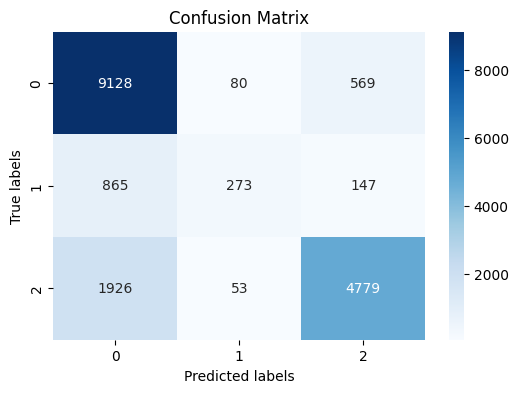

In [145]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [146]:
def tranform_water_pump2(X_text):
    # Eliminacion de variables poco relevantes, repetidas o con muchos missings o 0s
    X_text.drop(columns=['scheme_name', 'num_private', 'recorded_by'], axis=1, inplace=True)
    X_text.drop(columns=['extraction_type_group', 'extraction_type'], inplace=True)
    X_text.drop(columns=['quantity_group'], inplace=True)
    X_text['source'].replace('unknown', 'other', inplace=True)
    X_text.drop(columns=['source_type', 'source_class'], inplace=True)
    X_text.drop(columns='scheme_management', inplace=True)
    X_text.drop(columns='waterpoint_type_group', inplace=True)
    X_text.drop(columns='quality_group', inplace=True)
    X_text.drop(columns='region_code', inplace=True)
    X_text.drop(columns='payment_type', inplace=True)
    X_text.drop(columns='wpt_name', axis=1, inplace=True)
    # Fill nan
    X_text['funder'].fillna(value='Unknown', inplace=True)
    X_text['installer'].fillna(value='Unknown', inplace=True)
    X_text['subvillage'].fillna(value='Unknown', inplace=True)
    # replace missings with most frequent
    X_text['public_meeting'] = X_text['public_meeting'].replace(to_replace=np.nan, value=1)
    X_text['permit'] = X_text['permit'].replace(to_replace=np.nan, value=1)
    # Imputacion
    imputer = IterativeImputer(missing_values=0)
    col_construction_year = X_text['construction_year'].values.reshape(-1, 1).astype('int')
    construction_year_imputer = imputer.fit_transform(col_construction_year)
    construction_year_imputer = construction_year_imputer.round().astype('int')
    X_text['construction_year'] = construction_year_imputer
    # Dates y antiguedad 
    X_text['date_year_recorded'] = X_text['date_recorded'].dt.year
    X_text['antiguedad'] = X_text['date_year_recorded'] - X_text['construction_year']
    X_text['antiguedad'] = X_text['antiguedad'].astype('int')
    X_text.loc[X_text['antiguedad'] < 0, 'antiguedad'] = 0
    X_text.drop('date_recorded', inplace=True, axis=True)
    X_text.drop('date_year_recorded', inplace=True, axis=True)
    ## Variacion de procesado
    # Rare Label Encoder
    rle = RareLabelCategoricalEncoder(n_categories = 1, tol=0.05, variables=['funder', 'installer'])
    rle.fit(X_text)
    X_text = rle.transform(X_text)
    
    to_dummies = ['public_meeting', 'permit', 'funder', 'installer']
    for d in to_dummies:
        dummies = pd.get_dummies(X_text[d],prefix=d, dtype=int)
        X_text = pd.concat([X_text, dummies], axis=1)
        X_text.drop(d, axis=1, inplace=True)

    X_text.drop(columns=['lga', 'construction_year'], axis=1, inplace=True)

    cols_cat_countEnc = ['subvillage', 'ward']
    
    count_enc = CountEncoder(handle_missing='value')
    for col in cols_cat_countEnc:
        count_enc.fit(X_text[col])
        X_text[col] = count_enc.transform(X_text[col])

    list_labelEnc2 = list(X_text.loc[:,X_text.nunique() < 22])

    le = LabelEncoder()
    for l in list_labelEnc2:
        not_null_Value = X_text[l].notna()
        values_to_encode = X_text.loc[not_null_Value, l]
        le.fit(values_to_encode)
        X_text.loc[not_null_Value, l] = le.transform(values_to_encode)

    X_text.drop(columns=['public_meeting_False', 'permit_False'], axis=1, inplace=True)

    categ_cols = X_text.select_dtypes(exclude=np.number)
    for col in categ_cols:
        X_text[col] = X_text[col].astype('int64')

    return X_text

In [147]:
test_water_Pumps2_t = tranform_water_pump2(test_water_Pumps2)

C:\Users\byron\AppData\Local\Temp\ipykernel_19700\614659600.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_text.loc[not_null_Value, l] = le.transform(values_to_encode)
C:\Users\byron\AppData\Local\Temp\ipykernel_19700\614659600.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_text.loc[not_null_Value, l] = le.transform(values_to_encode)
C:\Users\byron\AppData\Local\Temp\ipykernel_19700\614659600.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype firs

In [148]:
y_pred_test2 = clf2.predict(test_water_Pumps2_t)

In [149]:
test_water_Pumps2['status_group'] = y_pred_test2

In [150]:
status_group_names = {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

In [151]:
test_water_Pumps2['status_group'].replace(status_group_names, inplace=True)

In [152]:
subir2 = test_water_Pumps2[['id', 'status_group']].copy()

In [153]:
subir2.reset_index(drop=True, inplace=True)

In [154]:
subir2.to_csv('subir2.csv', index=False)

### modificaciones adicionales al dataset

In [155]:
df3 = df2.copy()

In [156]:
corr = abs(df3.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
antiguedad,0.232674
waterpoint_type,0.206507
extraction_type_class,0.175338
ward,0.159053
quantity,0.131425
funder_Government Of Tanzania,0.117499
gps_height,0.114029
source,0.098044
region,0.091252


In [157]:
df3['quantity'].value_counts()

quantity
1    33186
2    15129
0     6246
3     4050
4      789
Name: count, dtype: int64

In [158]:
pd.crosstab(df3['quantity'], df3['status_group'], normalize='index') * 100

status_group,0,1,2
quantity,,,
0,2.513609,0.592379,96.894012
1,65.232327,7.231965,27.535708
2,52.323353,9.584242,38.092405
3,57.407407,10.271605,32.320988
4,26.996198,1.774398,71.229404


In [159]:
pd.crosstab(df3['quantity'], df3['status_group'])

status_group,0,1,2
quantity,,,
0,157,37,6052
1,21648,2400,9138
2,7916,1450,5763
3,2325,416,1309
4,213,14,562


No es muy claro pero se puede intuir gracias a la tabulacion cruzada que la categoria Seasonal en quantity se comporta de forma similar a insufficient, y para no dejar la categoria Unknown sola lo agruparemos con dry

Despues procederemos a realizar label encoder o dummies ya que tenemos menos categorias

In [160]:
repla_quanity = {3: 2, 4:0}

In [161]:
df3.replace(repla_quanity, inplace=True)

In [162]:
df3['quantity'].value_counts()

quantity
1    33186
2    19179
0     7035
Name: count, dtype: int64

In [163]:
dummies = pd.get_dummies(df3['quantity'],prefix='quantity', dtype=int)
df3 = pd.concat([df3, dummies], axis=1)

In [164]:
dummies.value_counts()

quantity_0  quantity_1  quantity_2
0           1           0             33186
            0           1             19179
1           0           0              7035
Name: count, dtype: int64

In [165]:
df3.drop(columns='quantity', inplace=True)

enough: 1
insufficient: 2
dry: 0

In [166]:
df3

,id,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,district_code,ward,population,extraction_type_class,management,management_group,payment,water_quality,source,waterpoint_type,status_group,antiguedad,public_meeting_True,permit_True,funder_Danida,funder_Government Of Tanzania,funder_Rare,funder_Unknown,installer_DWE,installer_Rare,installer_Unknown,quantity_0,quantity_1,quantity_2
0,69572,6000.0,1390,34.938093,-9.856322,1,6,2,5,36,109,0,7,0,2,6,8,1,0,12,1,0,0,0,1,0,0,1,0,0,1,0
1,8776,0.0,1399,34.698766,-2.147466,0,5,9,2,71,280,0,11,0,0,6,5,1,0,2,1,1,0,0,1,0,0,1,0,0,0,1
2,34310,25.0,686,37.460664,-3.821329,5,502,8,0,10,250,0,7,0,0,6,0,2,0,0,1,1,0,0,1,0,0,1,0,0,1,0
3,67743,0.0,263,38.486161,-11.155298,7,17,12,17,32,58,5,7,0,0,6,2,2,2,27,1,1,0,0,1,0,0,1,0,1,0,0
4,19728,0.0,0,31.130847,-1.825359,0,2,0,1,13,0,0,1,1,0,6,5,1,0,14,1,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,5,0,6,5,116,125,0,9,0,0,6,8,1,0,14,1,1,0,0,1,0,0,1,0,0,1,0
59396,27263,4700.0,1212,35.249991,-9.070629,6,14,2,0,53,56,0,7,0,2,6,6,1,0,15,1,1,0,0,1,0,0,1,0,0,1,0
59397,37057,0.0,0,34.017087,-8.750434,6,2,10,7,88,0,1,7,0,2,1,2,0,0,14,1,0,0,0,0,1,0,0,1,0,1,0
59398,31282,0.0,0,35.861315,-6.378573,6,24,2,0,25,0,1,7,0,0,6,7,0,0,14,1,1,0,0,1,0,0,1,0,0,0,1


In [167]:
corr = abs(df3.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
quantity_0,0.403816
waterpoint_type,0.302671
quantity_1,0.258402
antiguedad,0.232366
ward,0.159026
extraction_type_class,0.130778
funder_Government Of Tanzania,0.117499
gps_height,0.114028
source,0.095754


### Prueba modelo3

In [168]:
X = df3.drop(columns='status_group', axis=1)
y = df3['status_group']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [170]:
clf3 = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             max_depth=15, 
                             random_state=93, 
                             n_jobs=-1, 
                             min_samples_split=5, 
                             max_features='sqrt')

In [171]:
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_jobs=-1, random_state=93)

In [172]:
y_pred = clf3.predict(X_test)

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      9772
           1       0.72      0.22      0.33      1262
           2       0.86      0.70      0.77      6786

    accuracy                           0.79     17820
   macro avg       0.78      0.62      0.65     17820
weighted avg       0.80      0.79      0.78     17820



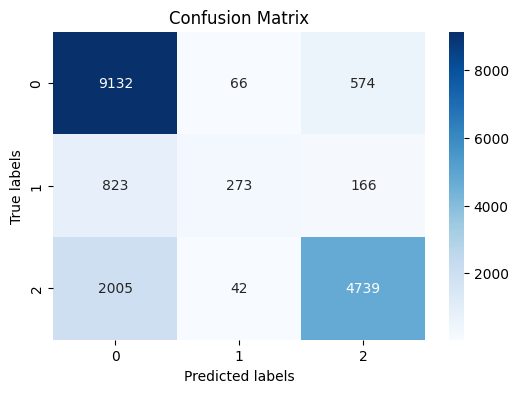

In [174]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [175]:
# Validación cruzada
cv = cross_val_score(
    clf3,
    X_train, 
    y_train,
    scoring = "roc_auc_ovo",
    cv = 5
)
print(cv)
print("CV ROC:", cv.mean(), np.std(cv))

[0.88140485 0.87989018 0.87877471 0.87635375 0.87250329]
CV ROC: 0.8777853562931227 0.0031131819824894796


In [176]:
# Validación cruzada
cv = cross_val_score(
    clf3,
    X_train, 
    y_train,
    scoring = "roc_auc_ovr",
    cv = 5
)
print(cv)
print("CV ROC:", cv.mean(), np.std(cv))

[0.89461752 0.89346425 0.8940417  0.89122466 0.88695802]
CV ROC: 0.8920612314691672 0.002798854303687484


### Prueba con hiperparametros y validacion cruzada

### Con todo

In [177]:
X3 = df3.drop(columns='status_group', axis=1)
y3 = df3['status_group']

In [178]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

In [179]:
clf_best = RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=20, 
    random_state=93, 
    n_jobs=-1).fit(X_train3, y_train3)

In [180]:
def tranform_water_pump3(X_text):
    # Eliminacion de variables poco relevantes, repetidas o con muchos missings o 0s
    X_text.drop(columns=['scheme_name', 'num_private', 'recorded_by'], axis=1, inplace=True)
    X_text.drop(columns=['extraction_type_group', 'extraction_type'], inplace=True)
    X_text.drop(columns=['quantity_group'], inplace=True)
    X_text['source'].replace('unknown', 'other', inplace=True)
    X_text.drop(columns=['source_type', 'source_class'], inplace=True)
    X_text.drop(columns='scheme_management', inplace=True)
    X_text.drop(columns='waterpoint_type_group', inplace=True)
    X_text.drop(columns='quality_group', inplace=True)
    X_text.drop(columns='region_code', inplace=True)
    X_text.drop(columns='payment_type', inplace=True)
    X_text.drop(columns='wpt_name', axis=1, inplace=True)
    # Fill nan
    X_text['funder'].fillna(value='Unknown', inplace=True)
    X_text['installer'].fillna(value='Unknown', inplace=True)
    X_text['subvillage'].fillna(value='Unknown', inplace=True)
    # replace missings with most frequent
    X_text['public_meeting'] = X_text['public_meeting'].replace(to_replace=np.nan, value=1)
    X_text['permit'] = X_text['permit'].replace(to_replace=np.nan, value=1)
    # Imputacion
    imputer = IterativeImputer(missing_values=0)
    col_construction_year = X_text['construction_year'].values.reshape(-1, 1).astype('int')
    construction_year_imputer = imputer.fit_transform(col_construction_year)
    construction_year_imputer = construction_year_imputer.round().astype('int')
    X_text['construction_year'] = construction_year_imputer
    # Dates y antiguedad 
    X_text['date_year_recorded'] = X_text['date_recorded'].dt.year
    X_text['antiguedad'] = X_text['date_year_recorded'] - X_text['construction_year']
    X_text['antiguedad'] = X_text['antiguedad'].astype('int')
    X_text.loc[X_text['antiguedad'] < 0, 'antiguedad'] = 0
    X_text.drop('date_recorded', inplace=True, axis=True)
    X_text.drop('date_year_recorded', inplace=True, axis=True)
    ## Variacion de procesado
    # Rare Label Encoder
    rle = RareLabelCategoricalEncoder(n_categories = 1, tol=0.05, variables=['funder', 'installer'])
    rle.fit(X_text)
    X_text = rle.transform(X_text)
    
    to_dummies = ['public_meeting', 'permit', 'funder', 'installer']
    for d in to_dummies:
        dummies = pd.get_dummies(X_text[d],prefix=d, dtype=int)
        X_text = pd.concat([X_text, dummies], axis=1)
        X_text.drop(d, axis=1, inplace=True)

    X_text.drop(columns=['lga', 'construction_year'], axis=1, inplace=True)

    cols_cat_countEnc = ['subvillage', 'ward']
    
    count_enc = CountEncoder(handle_missing='value')
    for col in cols_cat_countEnc:
        count_enc.fit(X_text[col])
        X_text[col] = count_enc.transform(X_text[col])

    list_labelEnc2 = list(X_text.loc[:,X_text.nunique() < 22])

    le = LabelEncoder()
    for l in list_labelEnc2:
        not_null_Value = X_text[l].notna()
        values_to_encode = X_text.loc[not_null_Value, l]
        le.fit(values_to_encode)
        X_text.loc[not_null_Value, l] = le.transform(values_to_encode)

    X_text.drop(columns=['public_meeting_False', 'permit_False'], axis=1, inplace=True)

    categ_cols = X_text.select_dtypes(exclude=np.number)
    for col in categ_cols:
        X_text[col] = X_text[col].astype('int64')

    repla_quanity = {3: 2, 4:0}
    X_text.replace(repla_quanity, inplace=True)
    dummies = pd.get_dummies(X_text['quantity'],prefix='quantity', dtype=int)
    X_text = pd.concat([X_text, dummies], axis=1)

    X_text.drop(columns='quantity', inplace=True)

    return X_text

In [181]:
test_water_Pumps3_t = tranform_water_pump3(test_water_Pumps3)

C:\Users\byron\AppData\Local\Temp\ipykernel_19700\1590220810.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_text.loc[not_null_Value, l] = le.transform(values_to_encode)
C:\Users\byron\AppData\Local\Temp\ipykernel_19700\1590220810.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_text.loc[not_null_Value, l] = le.transform(values_to_encode)
C:\Users\byron\AppData\Local\Temp\ipykernel_19700\1590220810.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype f

In [182]:
y_pred_test3 = clf_best.predict(test_water_Pumps3_t)

In [183]:
test_water_Pumps3['status_group'] = y_pred_test3

In [184]:
status_group_names = {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

In [185]:
test_water_Pumps3['status_group'].replace(status_group_names, inplace=True)

In [186]:
subir3 = test_water_Pumps3[['id', 'status_group']].copy()

In [187]:
subir3.reset_index(drop=True, inplace=True)

In [188]:
subir3.to_csv('subir3.csv', index=False)

In [189]:
test_water_Pumps3_t

,id,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,district_code,ward,population,extraction_type_class,management,management_group,payment,water_quality,source,waterpoint_type,antiguedad,public_meeting_True,permit_True,funder_Danida,funder_Government Of Tanzania,funder_Rare,funder_Unknown,installer_DWE,installer_Rare,installer_Unknown,quantity_0,quantity_1,quantity_2
0,50785,0.0,1996,35.290799,-4.059696,0,2,8,2,0,321,2,2,2,0,6,5,6,1,1,1,0,0,1,0,0,1,0,0,0,1
1,51630,0.0,1569,36.656709,-3.309214,5,1,0,2,14,300,0,7,0,0,6,8,1,13,1,1,0,1,0,0,1,0,0,0,0,1
2,17168,0.0,1567,34.767863,-5.004344,0,1,18,2,8,500,2,7,0,0,6,5,6,2,1,1,0,0,0,1,0,0,1,0,0,1
3,45559,0.0,267,38.058046,-9.418672,7,2,7,13,2,250,2,7,0,6,6,7,6,26,1,1,0,0,1,0,0,1,0,1,0,0
4,49871,500.0,1260,35.006123,-10.950412,7,2,16,2,16,60,0,9,0,2,6,8,1,13,1,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,34,38.852669,-6.582841,8,2,14,1,29,20,2,7,0,0,6,6,1,23,1,1,1,0,0,0,0,1,0,0,1,0
14846,18990,1000.0,0,37.451633,-5.350428,5,2,20,7,13,2960,1,7,0,2,0,7,0,17,1,0,0,0,1,0,0,1,0,0,0,1
14847,28749,0.0,1476,34.739804,-4.585587,0,7,18,2,13,200,0,7,0,0,6,0,1,2,1,1,0,0,0,1,0,0,1,0,0,1
14848,33492,0.0,998,35.432732,-10.584159,1,2,16,2,29,150,0,7,0,0,6,6,1,0,1,1,0,0,1,0,1,0,0,0,0,1


In [190]:
y_pred_test3

array([2, 0, 0, ..., 0, 0, 2], dtype=int64)